In [1]:
%pip install pandas
%pip install seaborn
%pip install matplotlib

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.6 MB 12.0 MB/s eta 0:00:01
   ------------------ --------------------- 5.2/11.6 MB 16.8 MB/s eta 0:00:01
   ------------------------------------ --- 10.5/11.6 MB 19.3 MB/s eta 0:00:01
   ---------------------------------------- 11.6/11.6 MB 15.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------- -------------------------- 2.6/8.0 MB 16.7 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.0 MB 19.1 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 15.5 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 24.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 13.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


=== COMPLETE ANALYSIS REPORT ===

=== Subject Counts ===
Total subject instances: 505
Unique subjects: 294

Total hours across all professors: 2258

=== Professor Analysis ===
              Professor  Total Subjects  Total Hours
0    ROJAS RODRIGUEZ RO               1           12
1    PADILLA GUZMAN SIL               3           26
2    OBILINOVIC GONZÁLE               8           14
3    YÁÑEZ MUÑOZ RICARD               8           14
4    AZÓCAR AZÓCAR PABL               8           15
..                  ...             ...          ...
148  GONZALEZ NAVARRETE               2            5
149  CASTRO CASTRO CEFE               5           20
150   QUIERO GELMI ALDO               7           40
151  VERA CABALLERO DAN               1           12
152  NEIRA CORTÉS PURIS               6           33

[153 rows x 3 columns]

=== Subjects by Activity ===
Teo    284
Lab    126
Pra     31
Tal     45
Ayu     13
Tut      6
dtype: int64

=== Subjects by Campus ===
Playa Brava    505
dtype: i

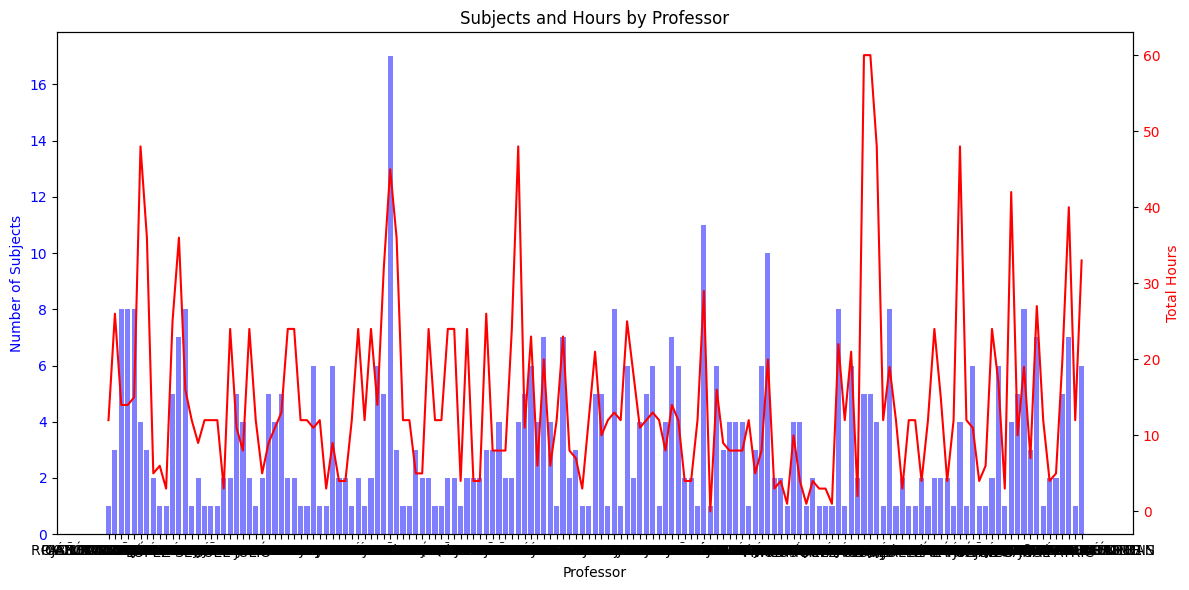

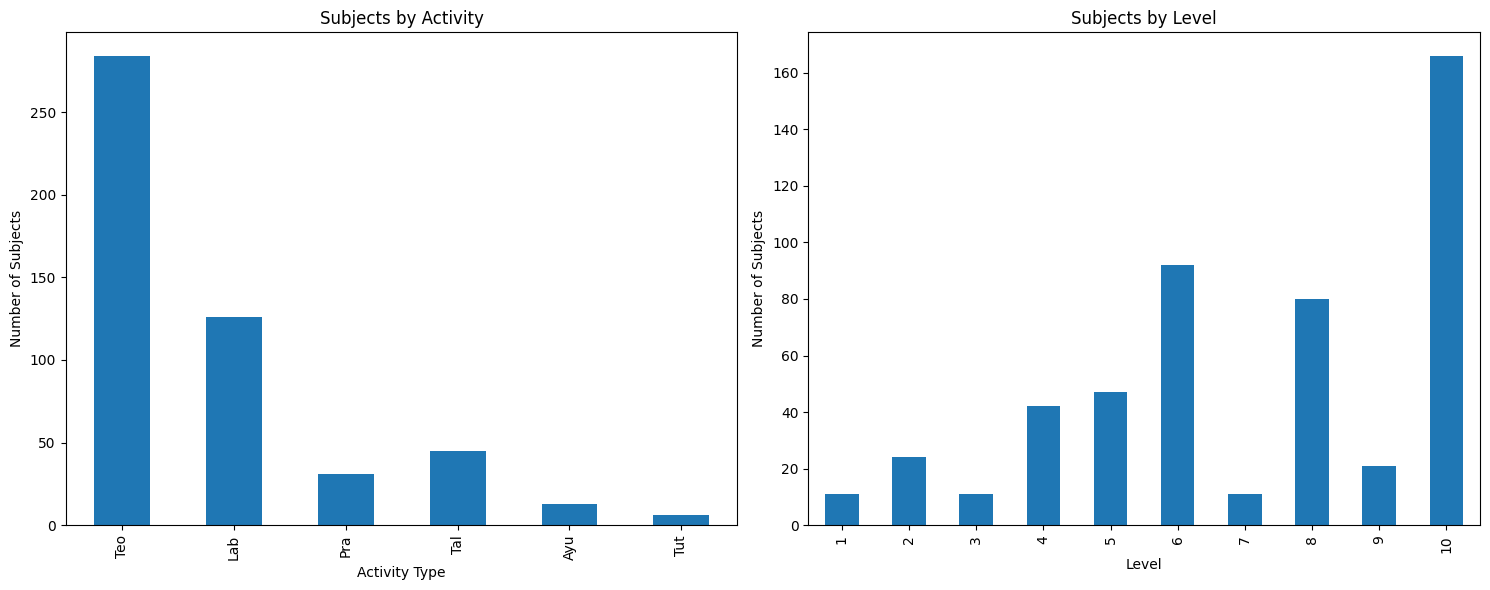

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_subjects_and_hours(data):
    # Initialize counters
    total_subjects = 0
    subjects_by_professor = {}
    subjects_by_activity = {}
    subjects_by_campus = {}
    subjects_by_level = {}
    unique_subjects = set()  # To track unique subject codes
    
    # Hours tracking (from previous code)
    total_hours = 0
    hours_by_professor = {}
    hours_by_activity = {}
    hours_by_campus = {}
    hours_by_level = {}
    
    # Process each professor
    for prof in data:
        prof_name = prof['Nombre']
        prof_subjects = len(prof['Asignaturas'])
        prof_hours = 0
        
        # Store professor's subject count
        subjects_by_professor[prof_name] = prof_subjects
        total_subjects += prof_subjects
        
        # Process each subject
        for subject in prof['Asignaturas']:
            hours = subject['Horas']
            activity = subject['Actividad']
            campus = subject['Campus']
            level = subject['Nivel']
            subject_code = subject['CodigoAsignatura']
            
            # Add to unique subjects set
            unique_subjects.add(subject_code)
            
            # Count subjects by different categories
            subjects_by_activity[activity] = subjects_by_activity.get(activity, 0) + 1
            subjects_by_campus[campus] = subjects_by_campus.get(campus, 0) + 1
            subjects_by_level[level] = subjects_by_level.get(level, 0) + 1
            
            # Hours calculations (from previous code)
            prof_hours += hours
            hours_by_activity[activity] = hours_by_activity.get(activity, 0) + hours
            hours_by_campus[campus] = hours_by_campus.get(campus, 0) + hours
            hours_by_level[level] = hours_by_level.get(level, 0) + hours
        
        hours_by_professor[prof_name] = prof_hours
        total_hours += prof_hours
    
    # Convert to DataFrames/Series
    prof_analysis = pd.DataFrame({
        'Professor': list(subjects_by_professor.keys()),
        'Total Subjects': list(subjects_by_professor.values()),
        'Total Hours': list(hours_by_professor.values())
    })
    
    return {
        'total_subjects': total_subjects,
        'unique_subjects': len(unique_subjects),
        'total_hours': total_hours,
        'prof_analysis': prof_analysis,
        'subjects_by_activity': pd.Series(subjects_by_activity),
        'subjects_by_campus': pd.Series(subjects_by_campus),
        'subjects_by_level': pd.Series(subjects_by_level),
        'hours_by_activity': pd.Series(hours_by_activity),
        'hours_by_campus': pd.Series(hours_by_campus),
        'hours_by_level': pd.Series(hours_by_level)
    }
    

def plot_complete_analysis(results):
    # 1. Combined bar plot of subjects and hours by professor
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    x = range(len(results['prof_analysis']))
    ax1.bar(x, results['prof_analysis']['Total Subjects'], color='b', alpha=0.5, label='Subjects')
    ax1.set_xlabel('Professor')
    ax1.set_ylabel('Number of Subjects', color='b')
    ax1.tick_params(axis='y', labelcolor='b')
    
    ax2 = ax1.twinx()
    ax2.plot(x, results['prof_analysis']['Total Hours'], color='r', label='Hours')
    ax2.set_ylabel('Total Hours', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    plt.title('Subjects and Hours by Professor')
    plt.xticks(x, results['prof_analysis']['Professor'], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    # 2. Subject distribution plots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    results['subjects_by_activity'].plot(kind='bar', ax=ax1)
    ax1.set_title('Subjects by Activity')
    ax1.set_xlabel('Activity Type')
    ax1.set_ylabel('Number of Subjects')
    
    results['subjects_by_level'].sort_index().plot(kind='bar', ax=ax2)
    ax2.set_title('Subjects by Level')
    ax2.set_xlabel('Level')
    ax2.set_ylabel('Number of Subjects')
    
    plt.tight_layout()
    plt.show()
    
    
def print_complete_statistics(results):
    print("=== COMPLETE ANALYSIS REPORT ===")
    print("\n=== Subject Counts ===")
    print(f"Total subject instances: {results['total_subjects']}")
    print(f"Unique subjects: {results['unique_subjects']}")
    print(f"\nTotal hours across all professors: {results['total_hours']}")
    
    print("\n=== Professor Analysis ===")
    print(results['prof_analysis'])
    
    print("\n=== Subjects by Activity ===")
    print(results['subjects_by_activity'])
    
    print("\n=== Subjects by Campus ===")
    print(results['subjects_by_campus'])
    
    print("\n=== Subjects by Level ===")
    print(results['subjects_by_level'].sort_index())

# Main execution
if __name__ == "__main__":
    # Load your data
    # Option 1: From file
    with open('inputOfProfesores.json', 'r', encoding="utf-8") as file:
        data = json.load(file)

    
    # Run analysis
    results = analyze_subjects_and_hours(data)
    
    # Print statistical results
    print_complete_statistics(results)
    
    # Generate visualizations
    plot_complete_analysis(results)